In [ ]:
# Imports.
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;
import h5_reader_xr as reader;
import gysela_utilities as utils;

# Styling.
plt.style.use("ggplot");

In [2]:
time_step = reader.fetch_data_from_h5("C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc\\Phi2D_d00000.h5")["deltat"].values;
data_arrays = reader.compile_data_from_directory("Phirth_n0", "C:\\Workspace\\NSCC\\local copies\\h5 samples\\q1.5_trunc");

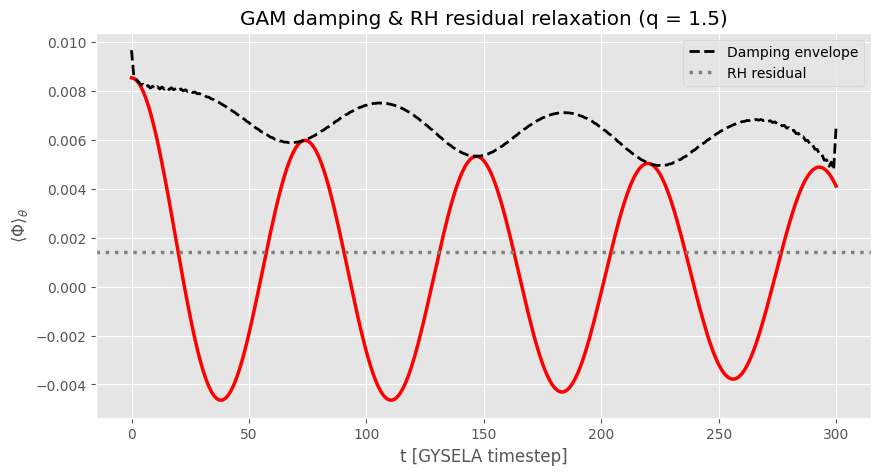

In [ ]:

def plot_rosenbluth_hinton(phi2D_list, radial_index):
	# Signal isolation and data processing.
	time_series = utils.generate_poloidally_averaged_time_series(phi2D_list)[:, radial_index].values;
	time_range = np.arange(len(time_series));
	amplitude_envelope, residual_level = utils.generate_residual_envelope(time_series);

	# Figure plotting logic.
	plt.figure(figsize = (10, 5));
	plt.plot(time_range[145:], time_series[145:], color = "red", lw = 2.5);
	plt.plot(time_range[145:], amplitude_envelope[145:], color = "black", linestyle = "--", label= "Damping envelope", lw = 2.0);
	plt.axhline(y = residual_level, color = "gray", linestyle = ":", label = f"RH residual", lw = 2.5);
	plt.xlabel("t [GYSELA timestep]");
	plt.ylabel(r"$\langle \Phi \rangle_\theta$");
	plt.title("GAM damping & RH residual relaxation (q = 1.5)");
	plt.legend(frameon = True, loc = "upper right");
	plt.show();

plot_rosenbluth_hinton(data_arrays, 30);